In [14]:
#adding libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt66
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [15]:
import pandas as pd
df = pd.read_csv("Student_performance_data.csv")

In [16]:
from google.colab import files
uploaded = files.upload()

Saving Student_performance_data.csv to Student_performance_data (1).csv


In [10]:
print(df["Gender"].value_counts())
print(df["Volunteering"].value_counts())
print(df["GradeClass"].value_counts())
print(df["Age"].value_counts())


Gender
1    1222
0    1170
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64
GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


In [6]:

# Eğer gender ve voluntary_work metinse önce sayıya çevir
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Volunteering"] = df["Volunteering"].astype("category").cat.codes

reduced_df = df[["GPA", "Age", "Volunteering", "Gender", "GradeClass","Age", "StudyTimeWeekly", "Absences"]]

# #Dataset data are displayed
print(reduced_df.describe())
print(reduced_df.info())

               GPA          Age  Volunteering       Gender   GradeClass  \
count  2392.000000  2392.000000   2392.000000  2392.000000  2392.000000   
mean      1.906186    16.468645      0.157191     0.510870     2.983696   
std       0.915156     1.123798      0.364057     0.499986     1.233908   
min       0.000000    15.000000      0.000000     0.000000     0.000000   
25%       1.174803    15.000000      0.000000     0.000000     2.000000   
50%       1.893393    16.000000      0.000000     1.000000     4.000000   
75%       2.622216    17.000000      0.000000     1.000000     4.000000   
max       4.000000    18.000000      1.000000     1.000000     4.000000   

               Age  StudyTimeWeekly     Absences  
count  2392.000000      2392.000000  2392.000000  
mean     16.468645         9.771992    14.541388  
std       1.123798         5.652774     8.467417  
min      15.000000         0.001057     0.000000  
25%      15.000000         5.043079     7.000000  
50%      16.000000

DATA NORMALIZATION


In [11]:
df["GPA"] = (df["GPA"] - df["GPA"].min()) / (df["GPA"].max() - df["GPA"].min())
df["StudyTimeWeekly"] = (df["StudyTimeWeekly"] - df["StudyTimeWeekly"].min()) / (df["StudyTimeWeekly"].max() - df["StudyTimeWeekly"].min())
df["Absences"] = (df["Absences"] - df["Absences"].min()) / (df["Absences"].max() - df["Absences"].min())
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

print(df.head(10))
print(df.describe())


   StudentID       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001  0.666667       1          0                  2         0.992773   
1       1002  1.000000       0          0                  1         0.771270   
2       1003  0.000000       0          2                  3         0.210718   
3       1004  0.666667       1          0                  3         0.501965   
4       1005  0.666667       1          0                  2         0.233840   
5       1006  1.000000       0          0                  1         0.409979   
6       1007  0.000000       0          1                  1         0.780928   
7       1008  0.000000       1          1                  4         0.772058   
8       1009  0.666667       0          0                  0         0.228310   
9       1010  0.333333       1          0                  1         0.923230   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0  0.241379         1             

# DATA VISUALISATION

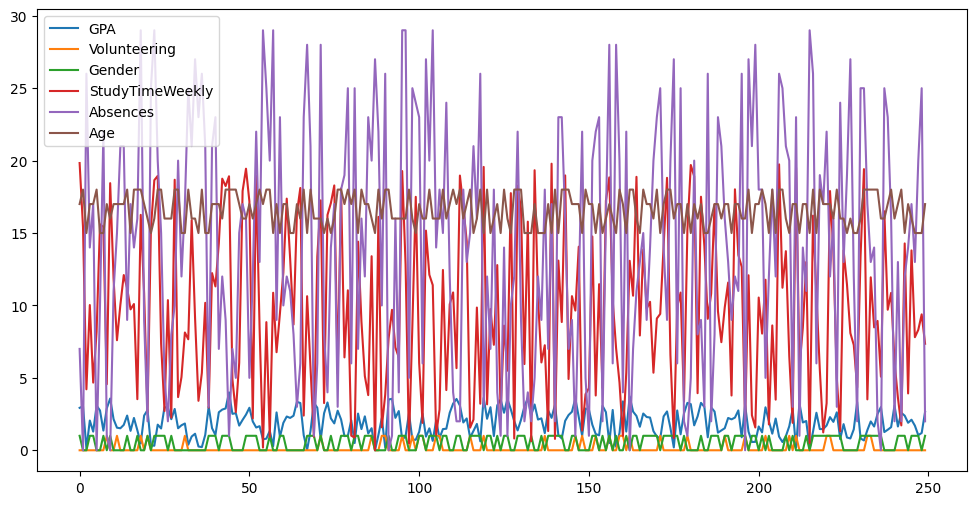

In [19]:
import matplotlib.pyplot as plt

# Select numeric features
data_for_visualisation = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "Age"]]

# Limit data to first 300 rows for clarity (optional)
data_for_visualisation = data_for_visualisation.head(250)

# Line plot
data_for_visualisation.plot(figsize=(12, 6))
plt.show()


Text(0.5, 0.98, 'Feature Pairplot by GradeClass')

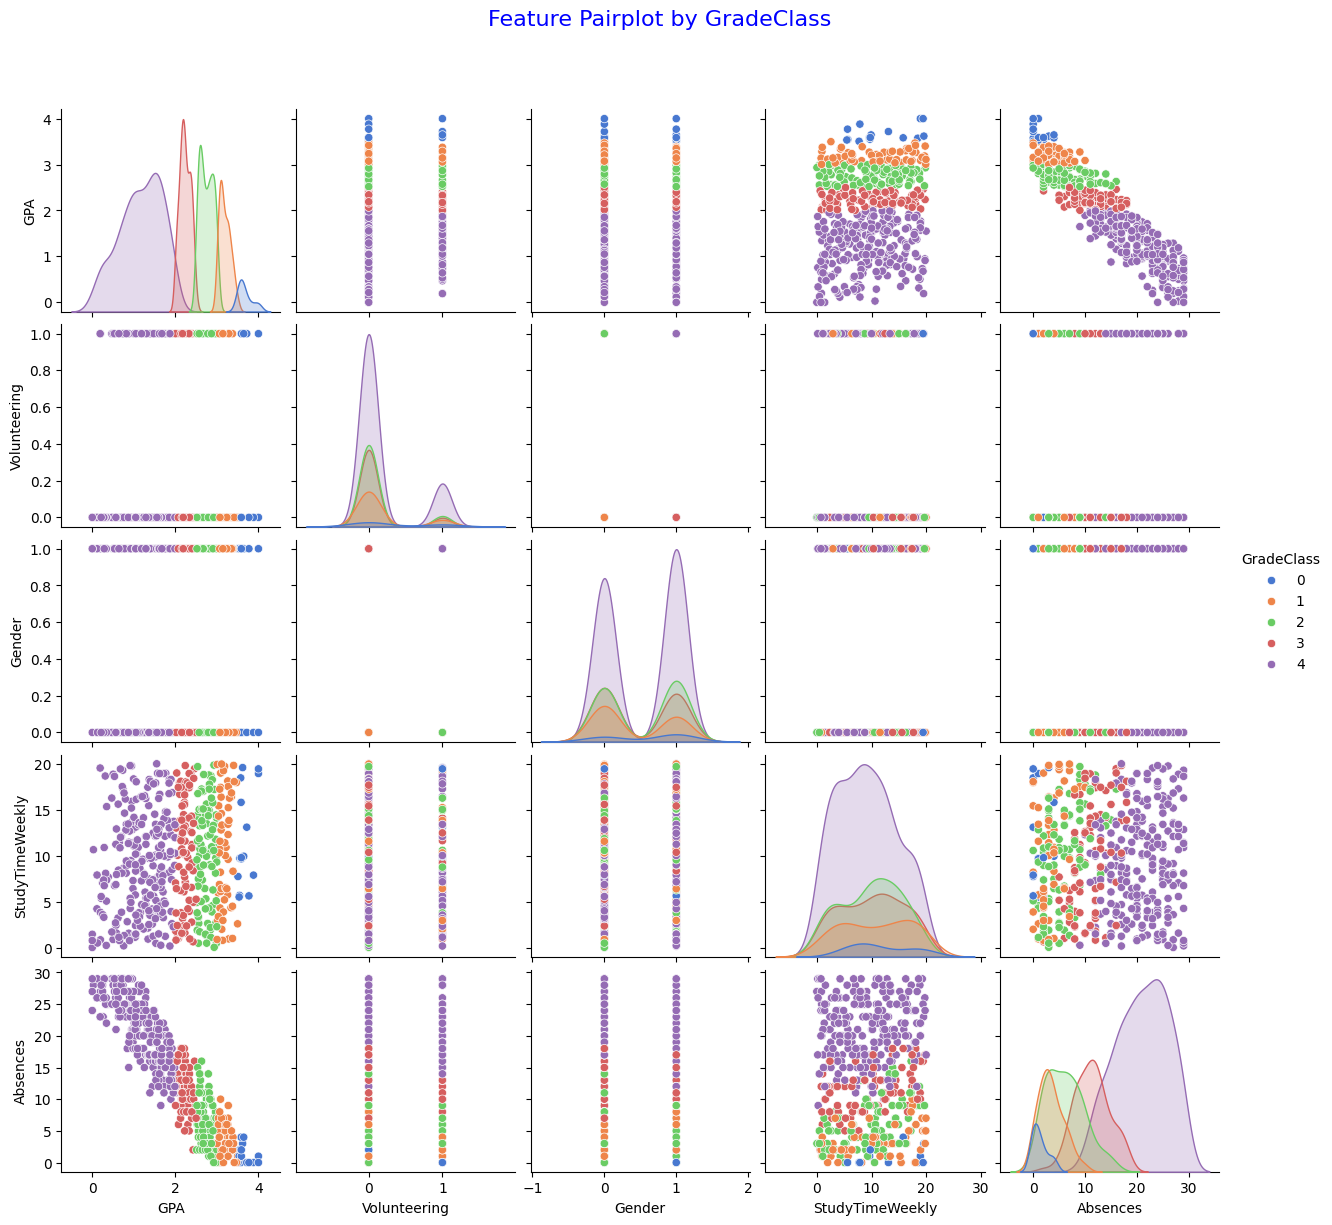

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of selected features
pairplot_df = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "GradeClass"]].dropna()

# Limit to first 500 samples for clearer visualization
pairplot_df = pairplot_df.head(500)

# Create pairplot with scatter plots and class coloring
plot = sns.pairplot(
    pairplot_df,
    hue="GradeClass",
    palette="muted",
    height=2.5,
    kind="scatter"
)

# Set plot title
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Feature Pairplot by GradeClass", fontsize=16, color='b')


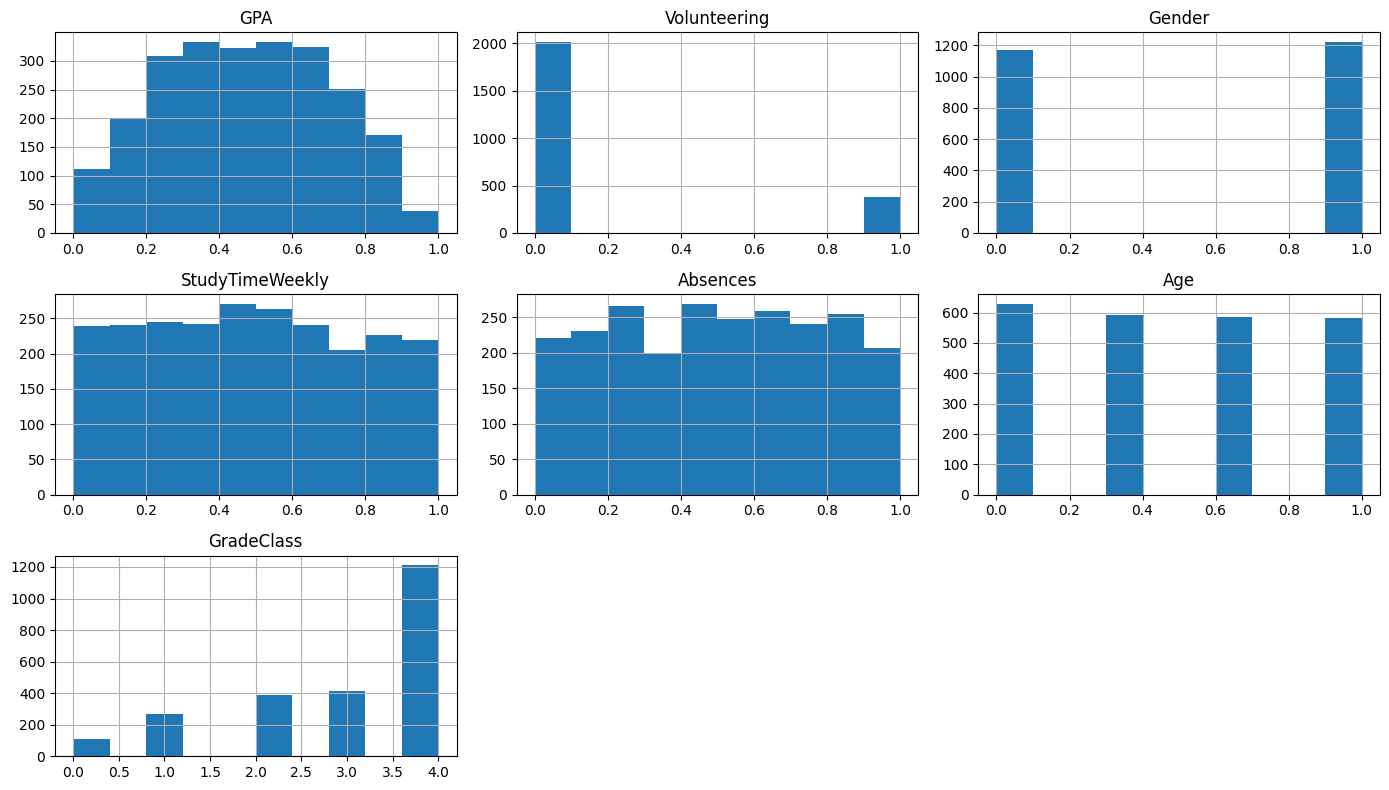

In [13]:
import matplotlib.pyplot as plt

# Select relevant numeric or categorical-as-numeric columns
columns_to_plot = ["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "Age", "GradeClass"]

# Plot histograms
df[columns_to_plot].hist(figsize=(14, 8))
plt.tight_layout()
plt.show()


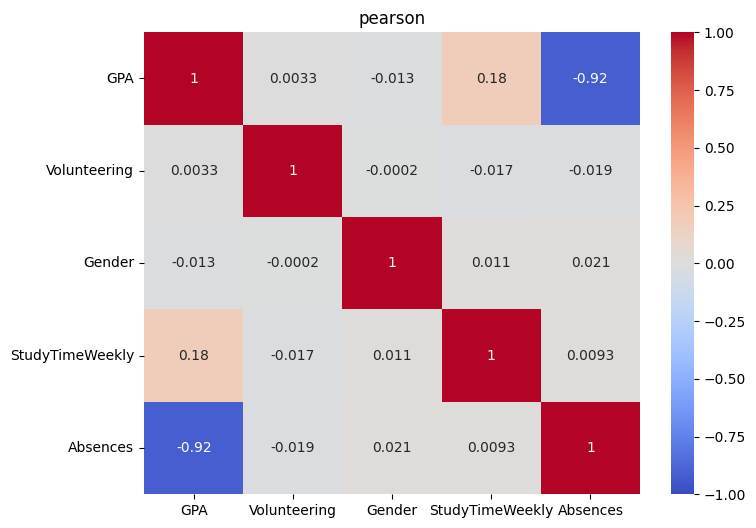

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_features = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences"]]

# Compute correlation matrix
correlation_matrix = numeric_features.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("pearson")
plt.show()


# TASK 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

clustering = AgglomerativeClustering().fit(clustering_dataset)



In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

model_2_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = model_2_clusters.fit_predict(clustering_dataset)



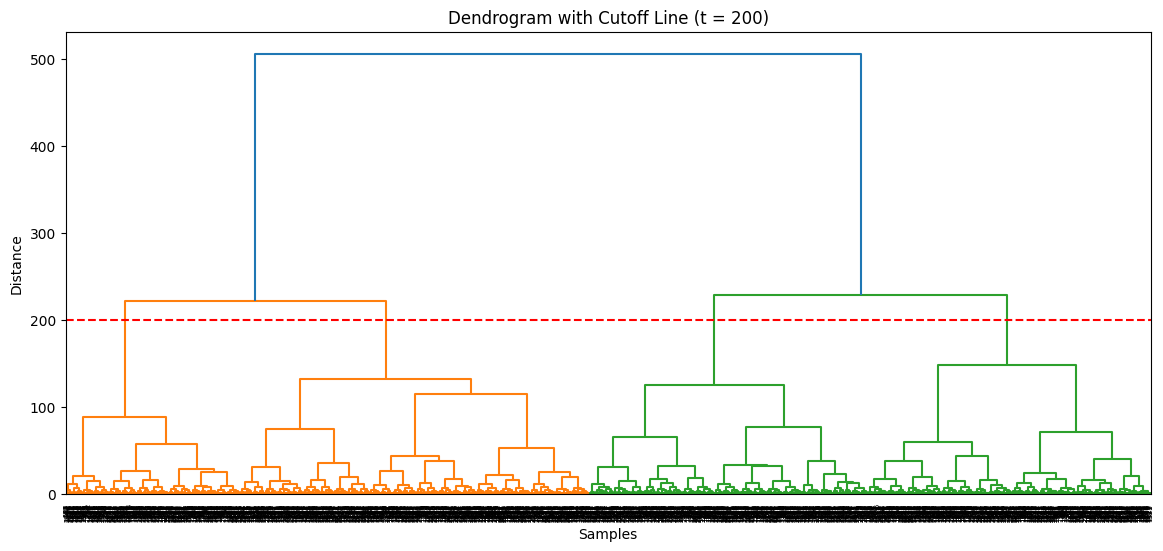

Cutoff t = 200 --> Number of clusters: 4


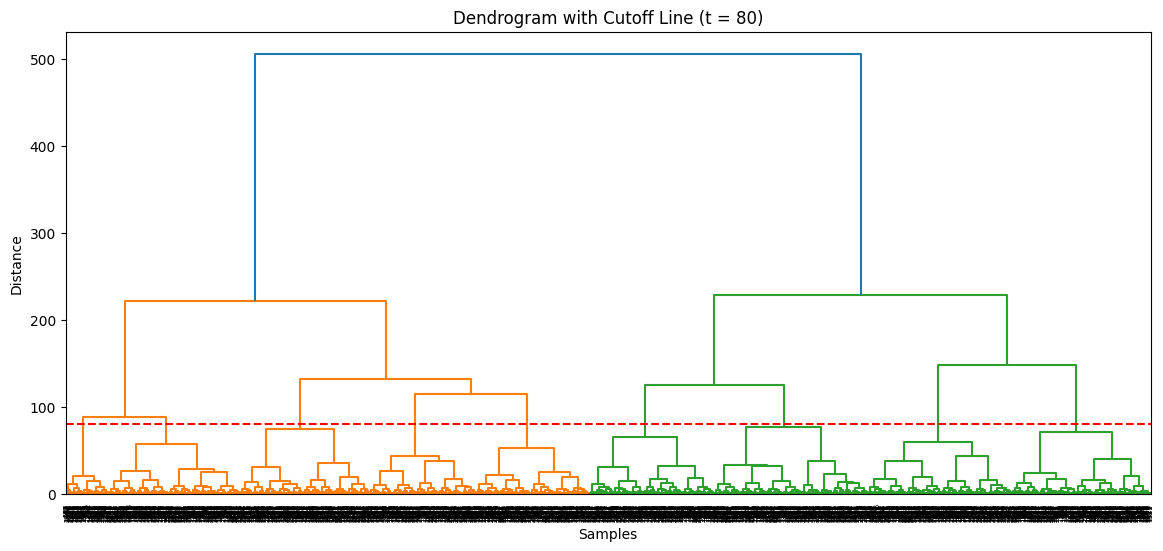

Cutoff t = 80 --> Number of clusters: 9


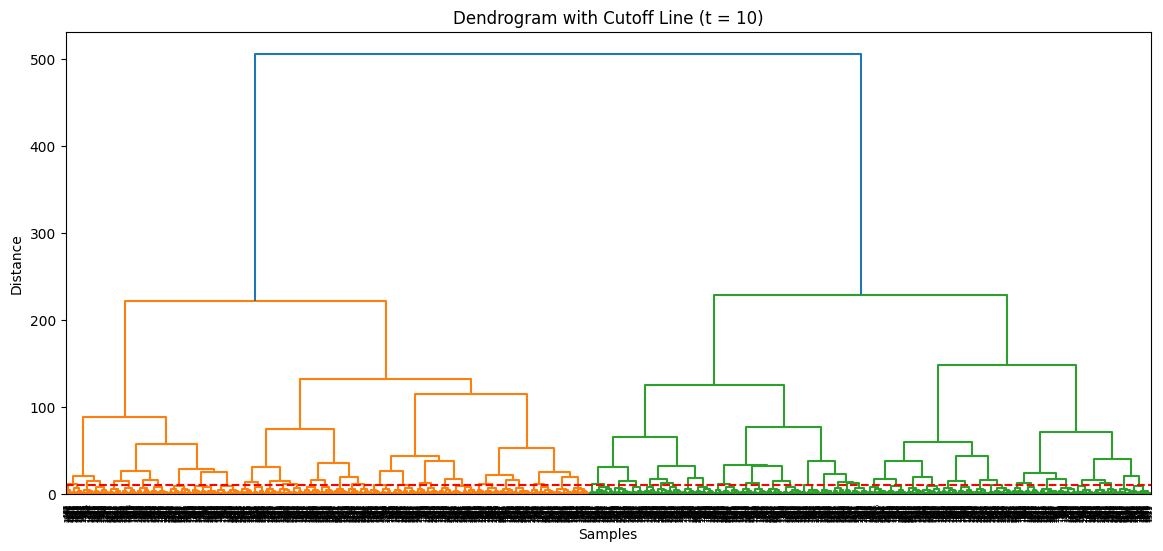

Cutoff t = 10 --> Number of clusters: 74


In [20]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# data selecting
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

#
linkage_matrix = shc.linkage(clustering_dataset, method='ward')

# Cutoff levels
cutoffs = [200, 80, 10]

#
for t in cutoffs:
    plt.figure(figsize=(14, 6))
    shc.dendrogram(linkage_matrix)
    plt.axhline(y=t, color='r', linestyle='--')
    plt.title(f"Dendrogram with Cutoff Line (t = {t})")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    #
    labels = fcluster(linkage_matrix, t=t, criterion='distance')
    print(f"Cutoff t = {t} --> Number of clusters: {len(set(labels))}")


# K-MEANS ALGORITHM

k = 2 --> Silhouette Score = 0.4340
k = 3 --> Silhouette Score = 0.3882
k = 4 --> Silhouette Score = 0.3694
k = 5 --> Silhouette Score = 0.3774
k = 6 --> Silhouette Score = 0.3716


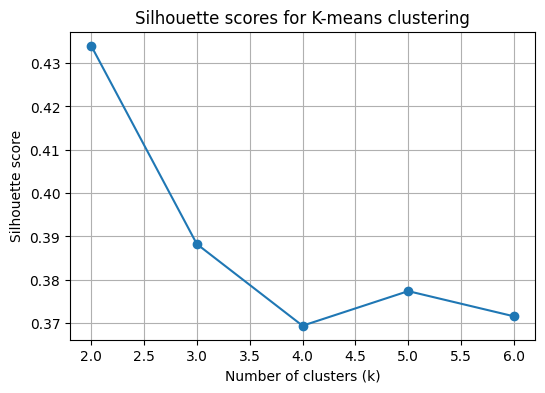

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Feature selection for clustering
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# List to store silhouette scores
silhouette_scores = []

# Loop through k values from 2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(clustering_dataset)
    score = metrics.silhouette_score(clustering_dataset, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k} --> Silhouette Score = {score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for K-means clustering")
plt.grid(True)
plt.show()


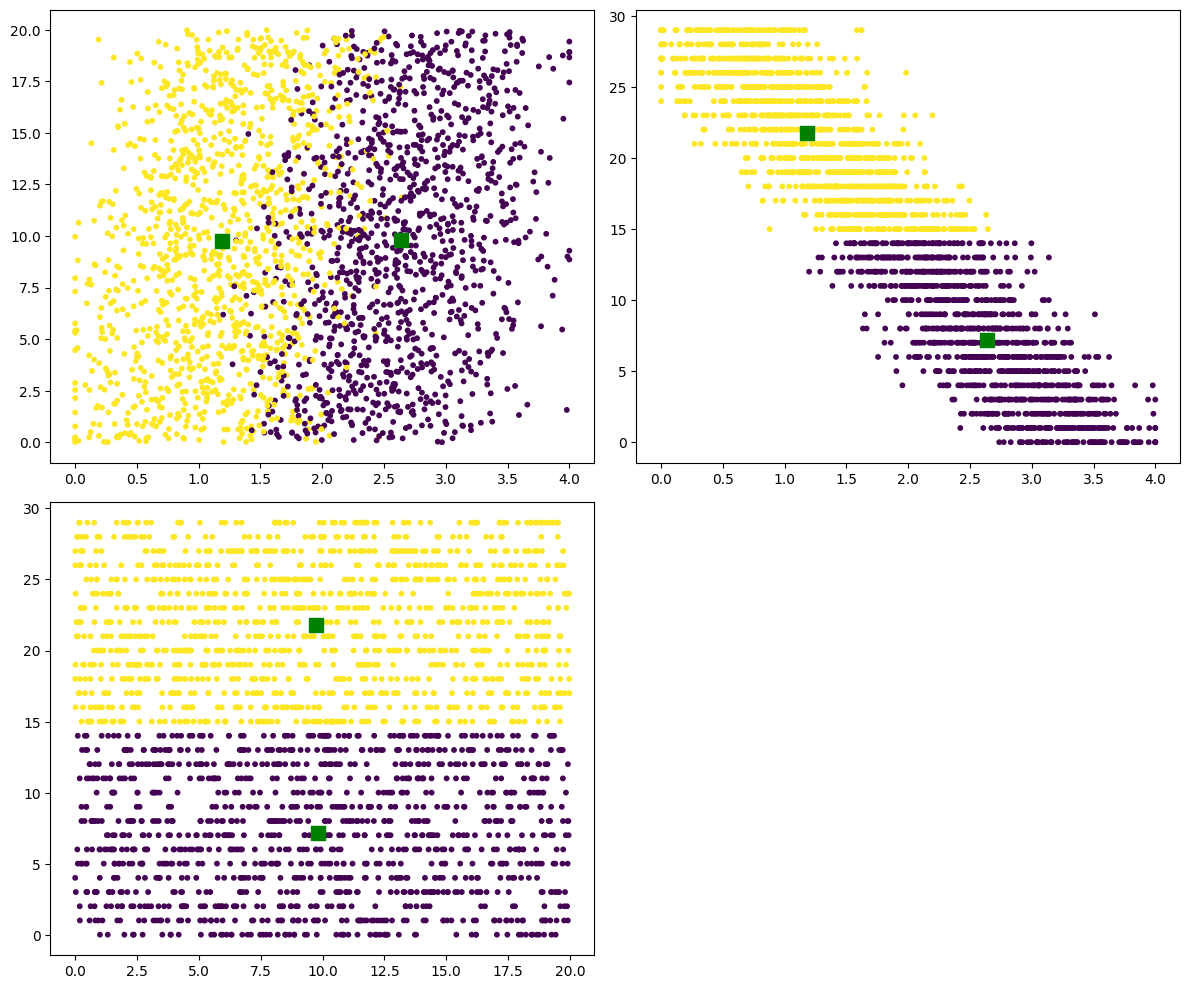

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use selected numeric features
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# Fit KMeans model
kmeans_model = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(clustering_dataset)

# Cluster centers
centroids = kmeans_model.cluster_centers_

# Predicted labels
y_pred = kmeans_model.predict(clustering_dataset)

# Plotting in 2x2 layout
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["StudyTimeWeekly"], s=10, c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='g', marker='s')

plt.subplot(2, 2, 2)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["Absences"], s=10, c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 2], s=100, c='g', marker='s')

plt.subplot(2, 2, 3)
plt.scatter(clustering_dataset["StudyTimeWeekly"], clustering_dataset["Absences"], s=10, c=y_pred)
plt.scatter(centroids[:, 1], centroids[:, 2], s=100, c='g', marker='s')

plt.tight_layout()
plt.show()
